#Building a Neural Network from Scratch. In this exercise we build the digit recognizer neural network from scratch, using numpy, pandas and pyplot.

In google colab you can get the MNIST files from the keras datasets and
you have to make some appropriate changes to the code to load the data
from there. In any case, make sure that the gray scale values for the images are scaled in the interval [0, 1].

##First you should verify that the code runs with 500 forward/backward propagation steps and learning rate α = 0.1, the accuracy of the trained network should be about 82 to 85 percent.

In the hope to get a higher accuracy, enlarge the neural network, by
adding an additional hidden layer and adding more interior nodes.

###Try 20 nodes in the first and 10 nodes in the second hidden layer. Run propagation with 1000 steps and learning rate α = 0.1. How much improvement does the larger network provide? Turn in your code for the larger dataset and some printout that documents the accuracy rate.

#Loading MNIST Dataset from Keras and process

In [ ]:
#MA23M026
#Vinod Kumar

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load the MNIST dataset from Keras
(X, Y), (_, _) = mnist.load_data()

# Reshape and normalize the data
X = X.reshape(X.shape[0], -1) / 255.0
print('Shape of MNIST Dataset : ',X.shape)

# Split the data into training and dev sets
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size=1000, random_state=42)

X_train = X_train.T
X_dev = X_dev.T
m_train = X_train.shape[1]
m_dev = X_dev.shape[1]

# Print the shapes of the datasets
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_dev shape:", X_dev.shape)
print("Y_dev shape:", Y_dev.shape)
print("Number of training examples:", m_train)
print("Number of development examples:", m_dev)

#MA23M026
#Vinod Kumar

Shape of MNIST Dataset :  (60000, 784)
X_train shape: (784, 59000)
Y_train shape: (59000,)
X_dev shape: (784, 1000)
Y_dev shape: (1000,)
Number of training examples: 59000
Number of development examples: 1000


In [ ]:
#MA23M026
#Vinod Kumar

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

#MA23M026
#Vinod Kumar

In [ ]:
#MA23M026
#Vinod Kumar

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / len(Y) * dZ2.dot(A1.T)
    db2 = 1 / len(Y) * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / len(Y) * dZ1.dot(X.T)
    db1 = 1 / len(Y) * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

def make_predictions(X, W1, b1, W2, b2):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

#MA23M026
#Vinod Kumar

##1 Hidden Layer with 10 nodes and 500 iterations.

In [ ]:
#MA23M026
#Vinod Kumar

def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

# Perform gradient descent
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 510)

Iteration:  0
Accuracy: 0.1213728813559322
Iteration:  100
Accuracy: 0.5873728813559322
Iteration:  200
Accuracy: 0.7273389830508474
Iteration:  300
Accuracy: 0.786
Iteration:  400
Accuracy: 0.8188474576271186
Iteration:  500
Accuracy: 0.8367457627118644


Prediction:  [3]
Label:  3


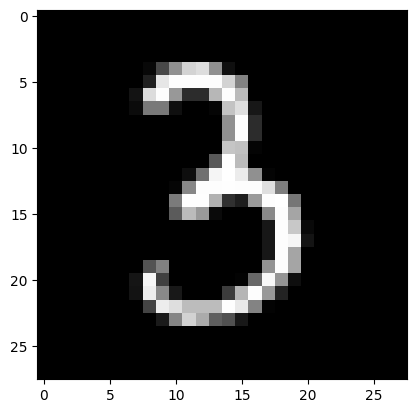

Prediction:  [8]
Label:  8


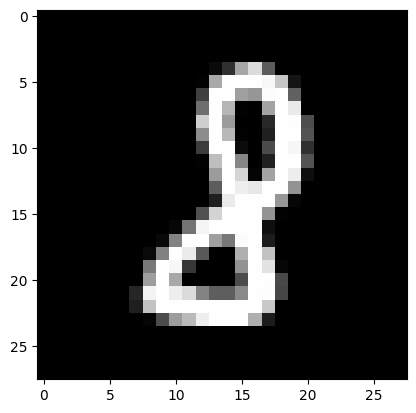

Prediction:  [5]
Label:  5


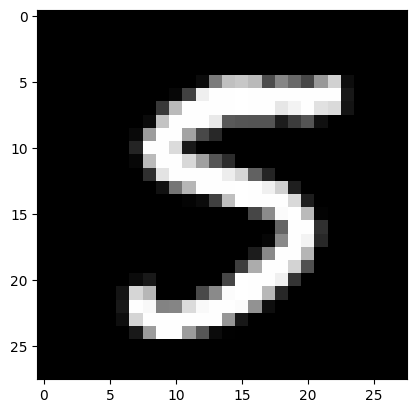

Prediction:  [6]
Label:  6


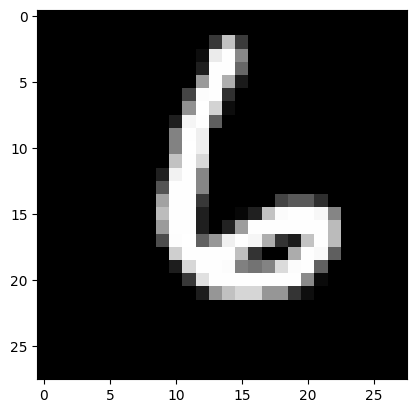

In [ ]:
#MA23M026
#Vinod Kumar

# Test some predictions
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
print("Development Set Accuracy:", get_accuracy(dev_predictions, Y_dev))

Development Set Accuracy: 0.828


##20 Nodes in first hidden layer and 10 Nodes in second hidden Layer with 1000 iterations.

In [ ]:
#MA23M026
#Vinod Kumar

def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X.T) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    m = Y.shape[0]

    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * np.dot(dZ3, A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dZ2 = np.dot(W3.T, dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.dot(W2.T, dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * np.dot(dZ1, X)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2, dW3, db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    W3 -= alpha * dW3
    b3 -= alpha * db3
    return W1, b1, W2, b2, W3, b3

def get_predictions(A3):
    return np.argmax(A3, 0)


def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            print("Accuracy:", get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X.T)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

In [ ]:
#MA23M026
#Vinod Kumar

def init_params():
    W1 = np.random.randn(20, 784) * 0.1
    b1 = np.zeros((20, 1))
    W2 = np.random.randn(10, 20) * 0.1
    b2 = np.zeros((10, 1))
    W3 = np.random.randn(10, 10) * 0.1
    b3 = np.zeros((10, 1))
    return W1, b1, W2, b2, W3, b3

# Perform gradient descent
W1, b1, W2, b2, W3, b3 = gradient_descent(X_train.T, Y_train, 0.10, 1010)

Iteration:  0
Accuracy: 0.10783050847457627
Iteration:  100
Accuracy: 0.4023898305084746
Iteration:  200
Accuracy: 0.7838474576271186
Iteration:  300
Accuracy: 0.8556271186440678
Iteration:  400
Accuracy: 0.8779491525423729
Iteration:  500
Accuracy: 0.8908474576271187
Iteration:  600
Accuracy: 0.8985254237288136
Iteration:  700
Accuracy: 0.9046101694915254
Iteration:  800
Accuracy: 0.9096271186440678
Iteration:  900
Accuracy: 0.9138983050847458
Iteration:  1000
Accuracy: 0.9172372881355932


Prediction:  [3]
Label:  3


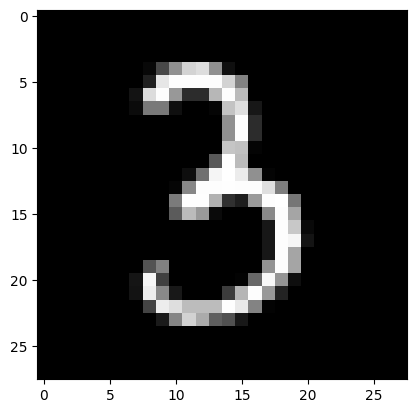

Prediction:  [8]
Label:  8


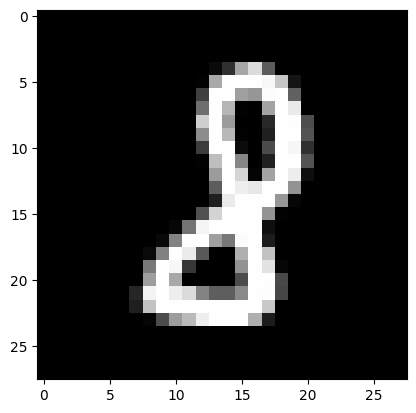

Prediction:  [5]
Label:  5


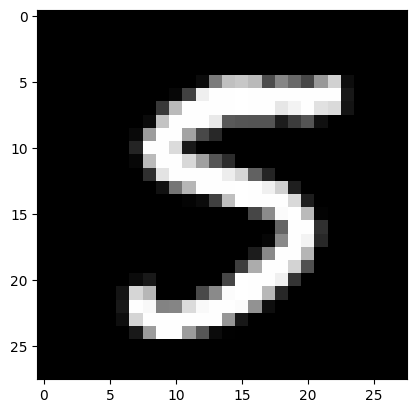

Prediction:  [6]
Label:  6


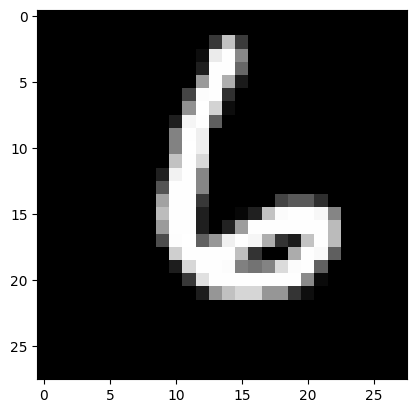

Prediction:  [9]
Label:  9


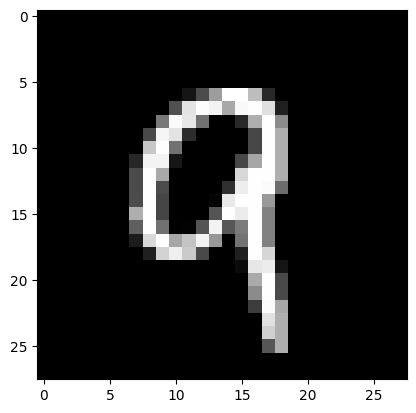

Prediction:  [4]
Label:  9


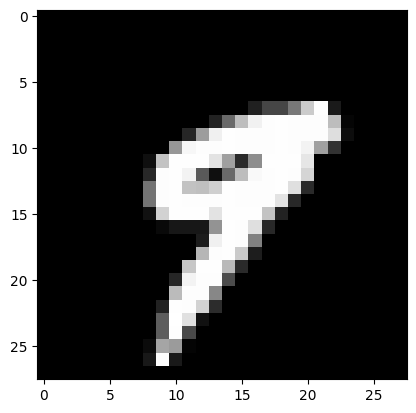

Prediction:  [7]
Label:  7


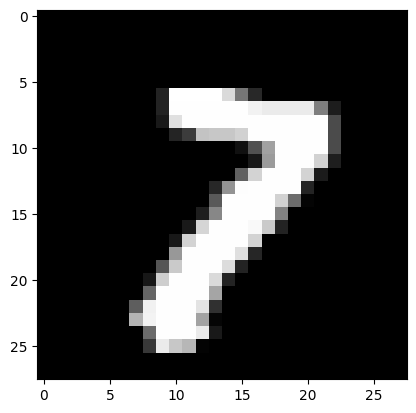

Prediction:  [9]
Label:  9


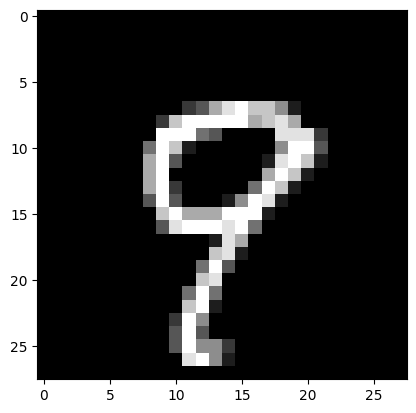

Prediction:  [5]
Label:  5


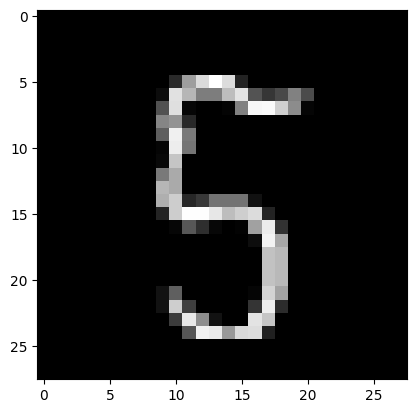

Prediction:  [3]
Label:  3


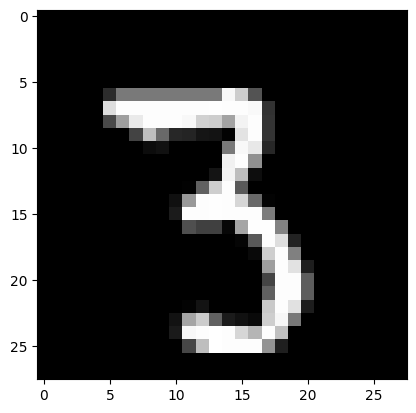

In [ ]:
# Test some predictions
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)
test_prediction(4, W1, b1, W2, b2, W3, b3)
test_prediction(5, W1, b1, W2, b2, W3, b3)
test_prediction(6, W1, b1, W2, b2, W3, b3)
test_prediction(7, W1, b1, W2, b2, W3, b3)
test_prediction(8, W1, b1, W2, b2, W3, b3)
test_prediction(9, W1, b1, W2, b2, W3, b3)

In [ ]:
#MA23M026
#Vinod Kumar

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)
print("Development Set Accuracy:", get_accuracy(dev_predictions, Y_dev))

Development Set Accuracy: 0.909


## Question : How much improvement does the larger network provide?

### Answer : The neural network with One additional hidden layer having 20 nodes giving good improvment in accuracy

Training Accuracy : 91 %

Development Accuracy : 90 %

###while we were getting

Training Accuracy : 83 %

Development Accuracy : 82 %

in the previous neural network